<a href="https://colab.research.google.com/github/satishchaudhary382/algorithmic-trading-with-python/blob/master/mpl_finance_12_6_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [601]:
# !pip install mplfinance
# !pip install pandas_ta
# !pip install MarketProfile

In [602]:
import pandas as pd
import pandas_ta as ta
import pandas_datareader as pdr
import mplfinance as mpt
from market_profile import MarketProfile

In [603]:
df = pdr.get_data_yahoo("MCD","12-2-2020")

In [604]:
# Market Profile 
mp = MarketProfile(df)
mp_slice = mp[df.index.min():df.index.max()]
profile = mp_slice.profile
market = pd.DataFrame({"Close":profile.index, 
                       "Value":profile})


In [605]:
# Squeeze 
df['s'] = ta.squeeze(df['High'], df['Low'], df['Close'])['SQZ_ON']
df['ss'] = df.apply(lambda x: x['High'] if x['s']==1 else np.nan, axis =1)

In [609]:
# MACD 
def macd(a,b,c):
  fast = ta.t3(df['Close'], a)
  slow = ta.t3(df['Close'],b)
  diff = fast - slow
  sig = ta.t3(diff, c)
  return diff, sig


In [610]:
macd(14,21,7)

(Date
 2020-12-02         NaN
 2020-12-03         NaN
 2020-12-04         NaN
 2020-12-07         NaN
 2020-12-08         NaN
                 ...   
 2021-06-07   -2.035552
 2021-06-08   -1.931513
 2021-06-09   -1.836618
 2021-06-10   -1.734219
 2021-06-11   -1.601969
 Length: 132, dtype: float64, Date
 2020-12-02         NaN
 2020-12-03         NaN
 2020-12-04         NaN
 2020-12-07         NaN
 2020-12-08         NaN
                 ...   
 2021-06-07   -2.593357
 2021-06-08   -2.546781
 2021-06-09   -2.469730
 2021-06-10   -2.369408
 2021-06-11   -2.250722
 Name: T3_7_0.7, Length: 132, dtype: float64)

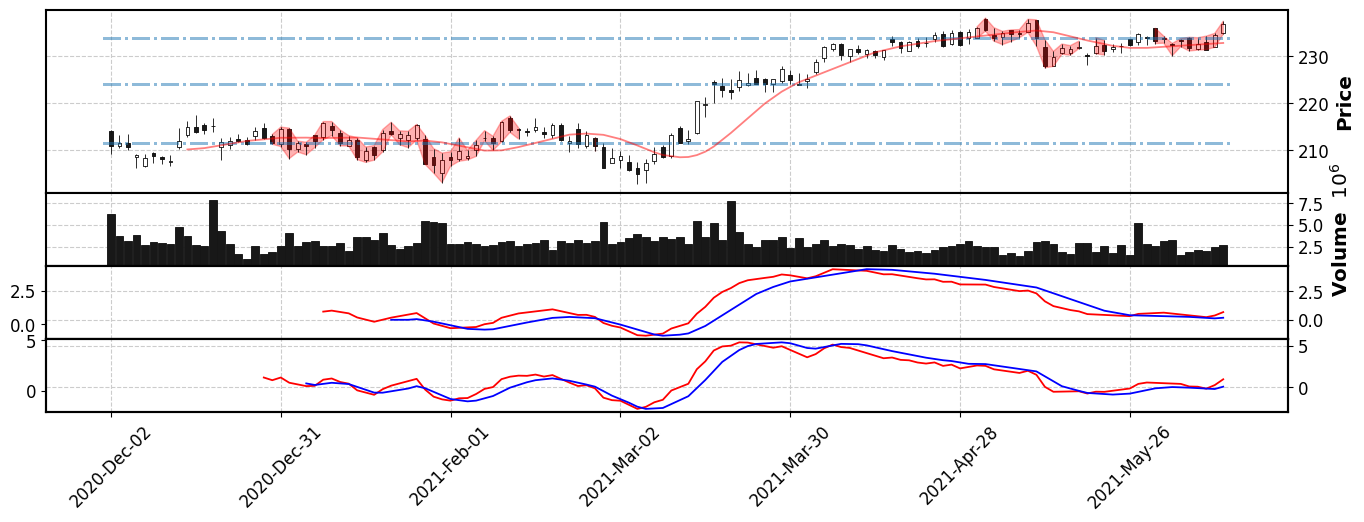

In [623]:
ap = [mpt.make_addplot(ta.macd(df['Close'])['MACD_12_26_9'], color = 'red', panel = 2),
      mpt.make_addplot(ta.macd(df['Close'])['MACDs_12_26_9'], color = 'blue', panel = 2),
      mpt.make_addplot(ta.macd(df['Close'],6,19,6)['MACD_6_19_6'], color = 'red', panel = 3),
      mpt.make_addplot(ta.macd(df['Close'],6,19,6)['MACDs_6_19_6'], color = 'blue', panel = 3),
      mpt.make_addplot(ta.t3(df['Close']),panel = 0, color = 'red', alpha = 0.5)]
mpt.plot(df, type = 'candle', style = 'classic', 
         hlines = dict(hlines=market.sort_values(by = "Value", ascending = True).tail(3)['Close'].values.tolist(), linestyle = "-.", alpha = 0.5),
         figratio = (30,10), 
         fill_between = dict(y1 = df['ss'].values, y2 = df['Low'].values, alpha = 0.3, color = 'red'), 
         volume = True, addplot = ap)